In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi

data = pd.read_csv('SBIN.NS.txt')
prices = data['Close'].to_numpy()
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
61,2020-09-24,181.100006,181.800003,175.500000,176.350006,176.350006,46114798
62,2020-09-25,179.000000,182.750000,176.149994,182.199997,182.199997,46550127
63,2020-09-28,184.000000,188.149994,183.350006,187.250000,187.250000,41921548
64,2020-09-29,188.500000,188.949997,183.250000,185.050003,185.050003,35688726
65,2020-09-30,185.050003,186.800003,182.399994,185.399994,185.399994,37641083


In [3]:
us = np.log(prices[1:]/prices[:-1]) 
n = len(prices) - 1
Eu = sum(us)/float(n)
sigma2 = np.sum((us - Eu)**2)/(n-1)
mu = Eu + sigma2/2.0
sigma = sqrt(sigma2)
print(mu, sigma)

0.0002981060700200034 0.02228172705870555


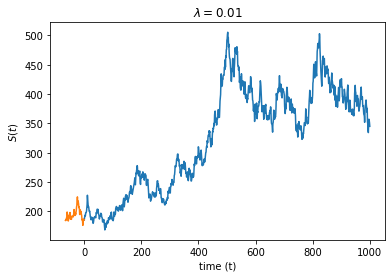

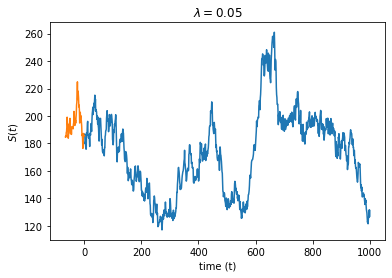

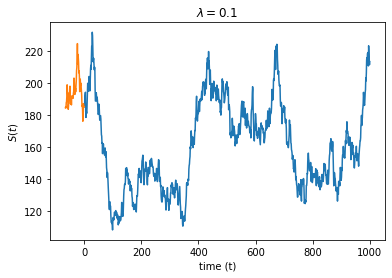

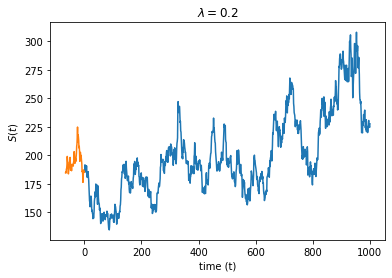

In [20]:
# t = 0 is end of Sept 30th, t = 1 is end of Oct 1st
# S(0) = 185.399994
S0 = 185.399994

t = np.linspace(0, 1000, num=1000)

# as we're sampling linearly, t_{i+1} - t_i is constant, call it dt
dt = t[1] - t[0]

for Lambda in [0.01, 0.05, 0.1, 0.2]:
    X = [np.log(S0)]

    for i in range(len(t)-1):
        z = np.random.normal()
        N = np.random.poisson(Lambda*dt)
        M = sum(mu + sigma*np.random.normal() for _ in range(N))
        X.append(X[-1] + (mu-sigma2/2)*dt + sigma*sqrt(dt)*z + M)

    S = [np.exp(x) for x in X]

    plt.plot(t, S)
    plt.plot(  list(range(-len(prices), 0))   ,  prices)
    plt.xlabel('time (t)')
    plt.ylabel('$S(t)$')
    plt.title(f'$\lambda = {Lambda}$')
    plt.savefig(f'./submission/graph_{Lambda}.png')
    
    plt.show()